In [61]:
#@title Load data

import pandas as pd

# Mengubah link spreadsheet menjadi URL
url = "https://docs.google.com/spreadsheets/d/1UgWa0hSXxldvyj5cX_L5ewyZIzPIAgwU/gviz/tq?tqx=out:csv"

# Membaca file CSV dari URL
df = pd.read_csv(url)

In [63]:
#@title slicing data hanya menggunakan 1000 data
df = df[0:1001]

In [64]:
df.head()

,Name,Comment,Time,Likes,Reply Count
0,@teguhhadyanto,Komentar komentar buzzeRp seragam,2/12/24 21:26,1,0.0
1,@ngkimwarkiman5388,Semoga indonesia jangan hanya tinggal nama,2/12/24 21:26,0,0.0
2,@hermawanbasri117,"Tidak sadarkah diri yg memangku amanah, bahwa ...",2/12/24 21:26,0,0.0
3,@winarnijhonwinarnijhon.2018,Sore ini aku mendapatkan amplop dan nama calon...,2/12/24 21:26,0,0.0
4,@rizkifauzan4579,02🎉,2/12/24 21:26,0,0.0


In [65]:
#@title Install modul sastrawi untuk preprocessing text berbahasa indonesia
!pip install Sastrawi

In [66]:
#@title fungsi cleansing dan preprocess_data untuk memproses text
import string, re

from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

factory = StopWordRemoverFactory()
stopword = factory.create_stop_word_remover()
factory = StemmerFactory()
Stemmer = factory.create_stemmer()


def preprocess_data(data):
  # cleansing data
  data = cleansing(data)

  #hapus stopwords
  factory = StopWordRemoverFactory()
  stopword = factory.create_stop_word_remover()
  data = stopword.remove(data)

  #steming
  factory = StemmerFactory()
  Stemmer = factory.create_stemmer()
  data = Stemmer.stem(data)

  # count vectorizer
  #data = vectorizer.transform([data])
  return data

def cleansing(data):
  #lower text
  data = data.lower()

  #hapus punctuation
  remove =string.punctuation
  translator = str.maketrans(remove,' '*len(remove))
  data = data.translate(translator)

  #remove ASCII dan unicode
  data = data.encode('ascii','ignore').decode('utf-8')
  data = re.sub(r'[^\x00-\x7f]',r'', data)

  #remove newline
  data = data.replace('\n','')

  return data



In [67]:
#@title fungsi penghitung kata
def count_word(sentence, word):
  """
  Menghitung jumlah kemunculan kata dalam kalimat.

  Args:
    sentence: Kalimat yang ingin dihitung.
    word: Kata yang ingin dicari.

  Returns:
    Jumlah kemunculan kata dalam kalimat.
  """

  count = 0
  for i in range(len(sentence)):
    if sentence[i:i+len(word)] == word:
      count += 1

  return count

In [68]:
#@title Preprocessing Text
df['Comment'] = [preprocess_data(df['Comment'][i]) for i in range(len(df))]

In [69]:
#@title Sortir Komentar Berdasarkan Like
df.sort_values(by="Likes", ascending=False).head()

,Name,Comment,Time,Likes,Reply Count
997,@diahdiah5636,semua tahu pampang jelas tonton depan mata ril...,2/12/24 20:57,68,1.0
473,@firdausrasyid6563,betapa keri milik sodara yg punya koneksi pemd...,2/12/24 21:12,43,0.0
773,@fifittriguna6932,terimakasih atas berani kalian bongkar bobrok ...,2/12/24 21:04,33,0.0
752,@menoliuszebua8142,film luar biasamembuka mata bathin yg mungkin ...,2/12/24 21:05,17,0.0
867,@budiindrawan9482,terima cerah,2/12/24 21:01,16,0.0


In [70]:
#@title Sortir Komentar Berdasarkan Reply Count
df.sort_values(by="Reply Count", ascending=False).head()

,Name,Comment,Time,Likes,Reply Count
308,@dienzbarrau9134,dia senjata pamungkas 01 03 jatuh 02 mau hipno...,2/12/24 21:17,2,2.0
555,@milaaqila1623,yg d bahas cuma paslon 2 3paslon 1 kemanadan s...,2/12/24 21:10,0,2.0
559,@hikayatullailah7720,sangat malu orang lulus hukum tatanegara buat ...,2/12/24 21:10,0,2.0
544,@AdjizulHafiz,hadoooo ko br skng y keluar tu film apakah,2/12/24 21:10,4,2.0
479,@anginlemahgenibanyunejagad5329,kuontol film lo munafik banget anjeng,2/12/24 21:12,0,2.0


In [71]:
#@title Perhitungan Frekuensi Nama Paslon

In [72]:
#@title Keyword Untuk Setiap Paslon
paslon1 = ["anis", "imin", "01", "1"]
paslon2 = ["prabowo", "bowo", "gemoy", "gibran", "samsul", "02", "2"]
paslon3 = ["ganjar", "mahfudz", "03", "3"]

In [73]:
#@title Frekuensi kata paslon 1
paslon1_freq = []
for keyword in paslon1:
  paslon1_freq.append(sum([count_word(df['Comment'][i], keyword) for i in range(len(df))]))

paslon1_freq = sum(paslon1_freq)

In [74]:
paslon1_freq

216

In [75]:
#@title Frekuensi kata paslon 2
paslon2_freq = []
for keyword in paslon2:
  paslon2_freq.append(sum([count_word(df['Comment'][i], keyword) for i in range(len(df))]))

paslon2_freq = sum(paslon2_freq)

In [76]:
paslon2_freq

590

In [77]:
#@title Frekuensi kata paslon 3
paslon3_freq = []
for keyword in paslon3:
  paslon3_freq.append(sum([count_word(df['Comment'][i], keyword) for i in range(len(df))]))

paslon3_freq = sum(paslon3_freq)

In [78]:
paslon3_freq

258

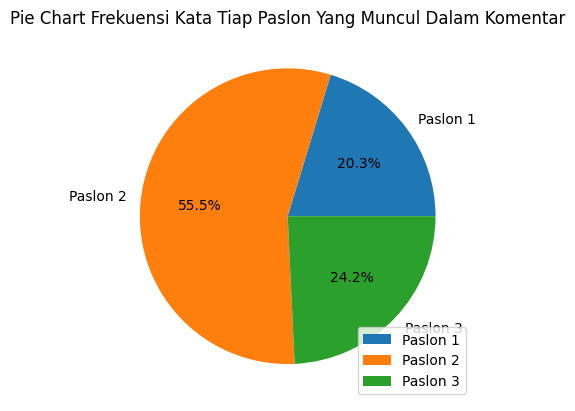

In [79]:
import matplotlib.pyplot as plt

all_paslon_freq = [paslon1_freq, paslon2_freq,paslon3_freq]
all_paslon_lab = ["Paslon 1", "Paslon 2", "Paslon 3"]

# Membuat pie chart
plt.pie(all_paslon_freq, labels=all_paslon_lab, autopct='%1.1f%%')

# Menambahkan judul dan label
plt.title("Pie Chart Frekuensi Kata Tiap Paslon Yang Muncul Dalam Komentar")
plt.legend()

# Menampilkan pie chart
plt.show()

In [80]:
#@title Clustering dengan Kmeans dengan jumlah cluster 2

In [81]:
#@markdown Sebelum dilakukan clustering, dilakukan ekstraksi fitur dengan TFIDF, karena sudah dilakukan preprocessing diawal jadi tidak perlu dilakukan preprocessing lagi
from sklearn.feature_extraction.text import TfidfVectorizer
X = df['Comment'].tolist()

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(X)

In [82]:
#@markdown Setelah melakukan ekstraksi fitur dengan tfidf, lalu dilakukan clustering dengan kmeans dengan menggunakan 2 jumlah klaster, karena clustering dengan kmeans ini bertujuan untuk membuat cluster mengenai respon terkait film Dirty Vote
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2)
labels = kmeans.fit_predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [83]:
df['Klaster'] = labels

In [84]:
df.head()

,Name,Comment,Time,Likes,Reply Count,Klaster
0,@teguhhadyanto,komentar komentar buzzerp seragam,2/12/24 21:26,1,0.0,0
1,@ngkimwarkiman5388,moga indonesia jangan tinggal nama,2/12/24 21:26,0,0.0,0
2,@hermawanbasri117,sadar diri yg memang amanah tiap langkah gerak...,2/12/24 21:26,0,0.0,0
3,@winarnijhonwinarnijhon.2018,sore aku dapat amplop nama calon ada sama ada ...,2/12/24 21:26,0,0.0,0
4,@rizkifauzan4579,02,2/12/24 21:26,0,0.0,0


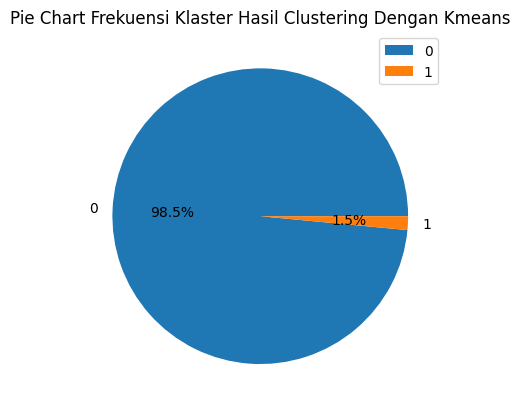

In [85]:
#@title Plot Pie Chart Untuk Klaster/Segmen Hasil Clustering Dengan Kmeans
import matplotlib.pyplot as plt

all_paslon_freq = [len(df[df['Klaster'] == 0]), len(df[df['Klaster'] == 1])]
all_paslon_lab = ["0", "1"]

# Membuat pie chart
plt.pie(all_paslon_freq, labels=all_paslon_lab, autopct='%1.1f%%')

# Menambahkan judul dan label
plt.title("Pie Chart Frekuensi Klaster Hasil Clustering Dengan Kmeans")
plt.legend()

# Menampilkan pie chart
plt.show()